In [51]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.tri import Triangulation
from matplotlib import cm, patches, collections

from pynextsim import NextsimBin
from pynextsim.nextsim_mesh import NextsimMesh

from pynextsim.gmshlib import GmshMesh
%matplotlib notebook

In [2]:
mesh_file='/data/experiments/run_330d_nodebug/mesh_final.bin'
mesh = NextsimMesh(mesh_file)

In [34]:
field_file='/data/experiments/run_330d_nodebug/field_final.bin'
field = NextsimBin(field_file)

In [37]:
field.variables

['Time',
 'M_nb_regrid',
 'Element_area',
 'M_VT',
 'M_dirichlet_flags',
 'M_wind',
 'Damage',
 'Ridge_ratio',
 'Concentration_update',
 'Tice_0',
 'Tice_1',
 'Tice_2',
 'SST',
 'SSS',
 'Fyi_fraction',
 'Age_d',
 'Age',
 'Concentration',
 'Thickness',
 'Snow',
 'Sigma_0',
 'Sigma_1',
 'Qassim',
 'Dmax']

In [47]:
thick = field.get_var('Thickness')

In [44]:
sst = field.get_var('SST')
sst.shape

(128566,)

In [43]:
vt = field.get_var('M_VT')
vt.shape

(132602,)

<IPython.core.display.Javascript object>


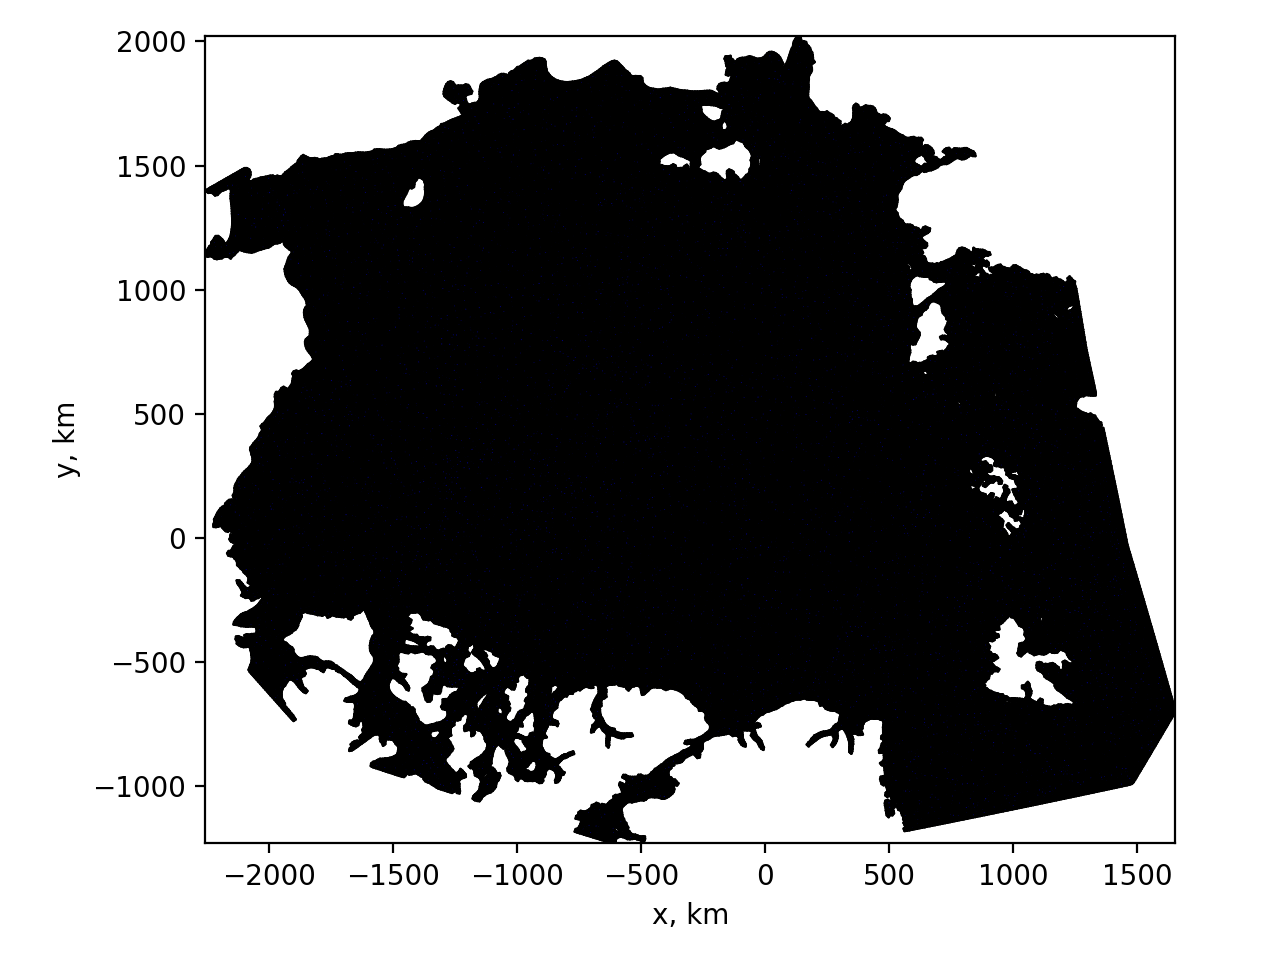

<AxesSubplot:xlabel='x, km', ylabel='y, km'>

In [3]:
mesh.plot()

In [19]:
nodes_x, nodes_y = mesh.get_nodes_xy()
indices = mesh.get_indices("triangles", numbering='gmsh', asvector=False)
Nn = mesh.num_nodes
Ne = mesh.num_triangles


In [61]:
nodes_x

array([  25861.69782511,   34678.90251759, -221401.13613364, ...,
        625310.5697524 ,  274741.84927557,  364287.75722305])

In [30]:
num_nodes.shape

(66301,)

In [42]:
print(Nn,Ne)

66301 128566


In [45]:
print(Nn*2)

132602


<IPython.core.display.Javascript object>


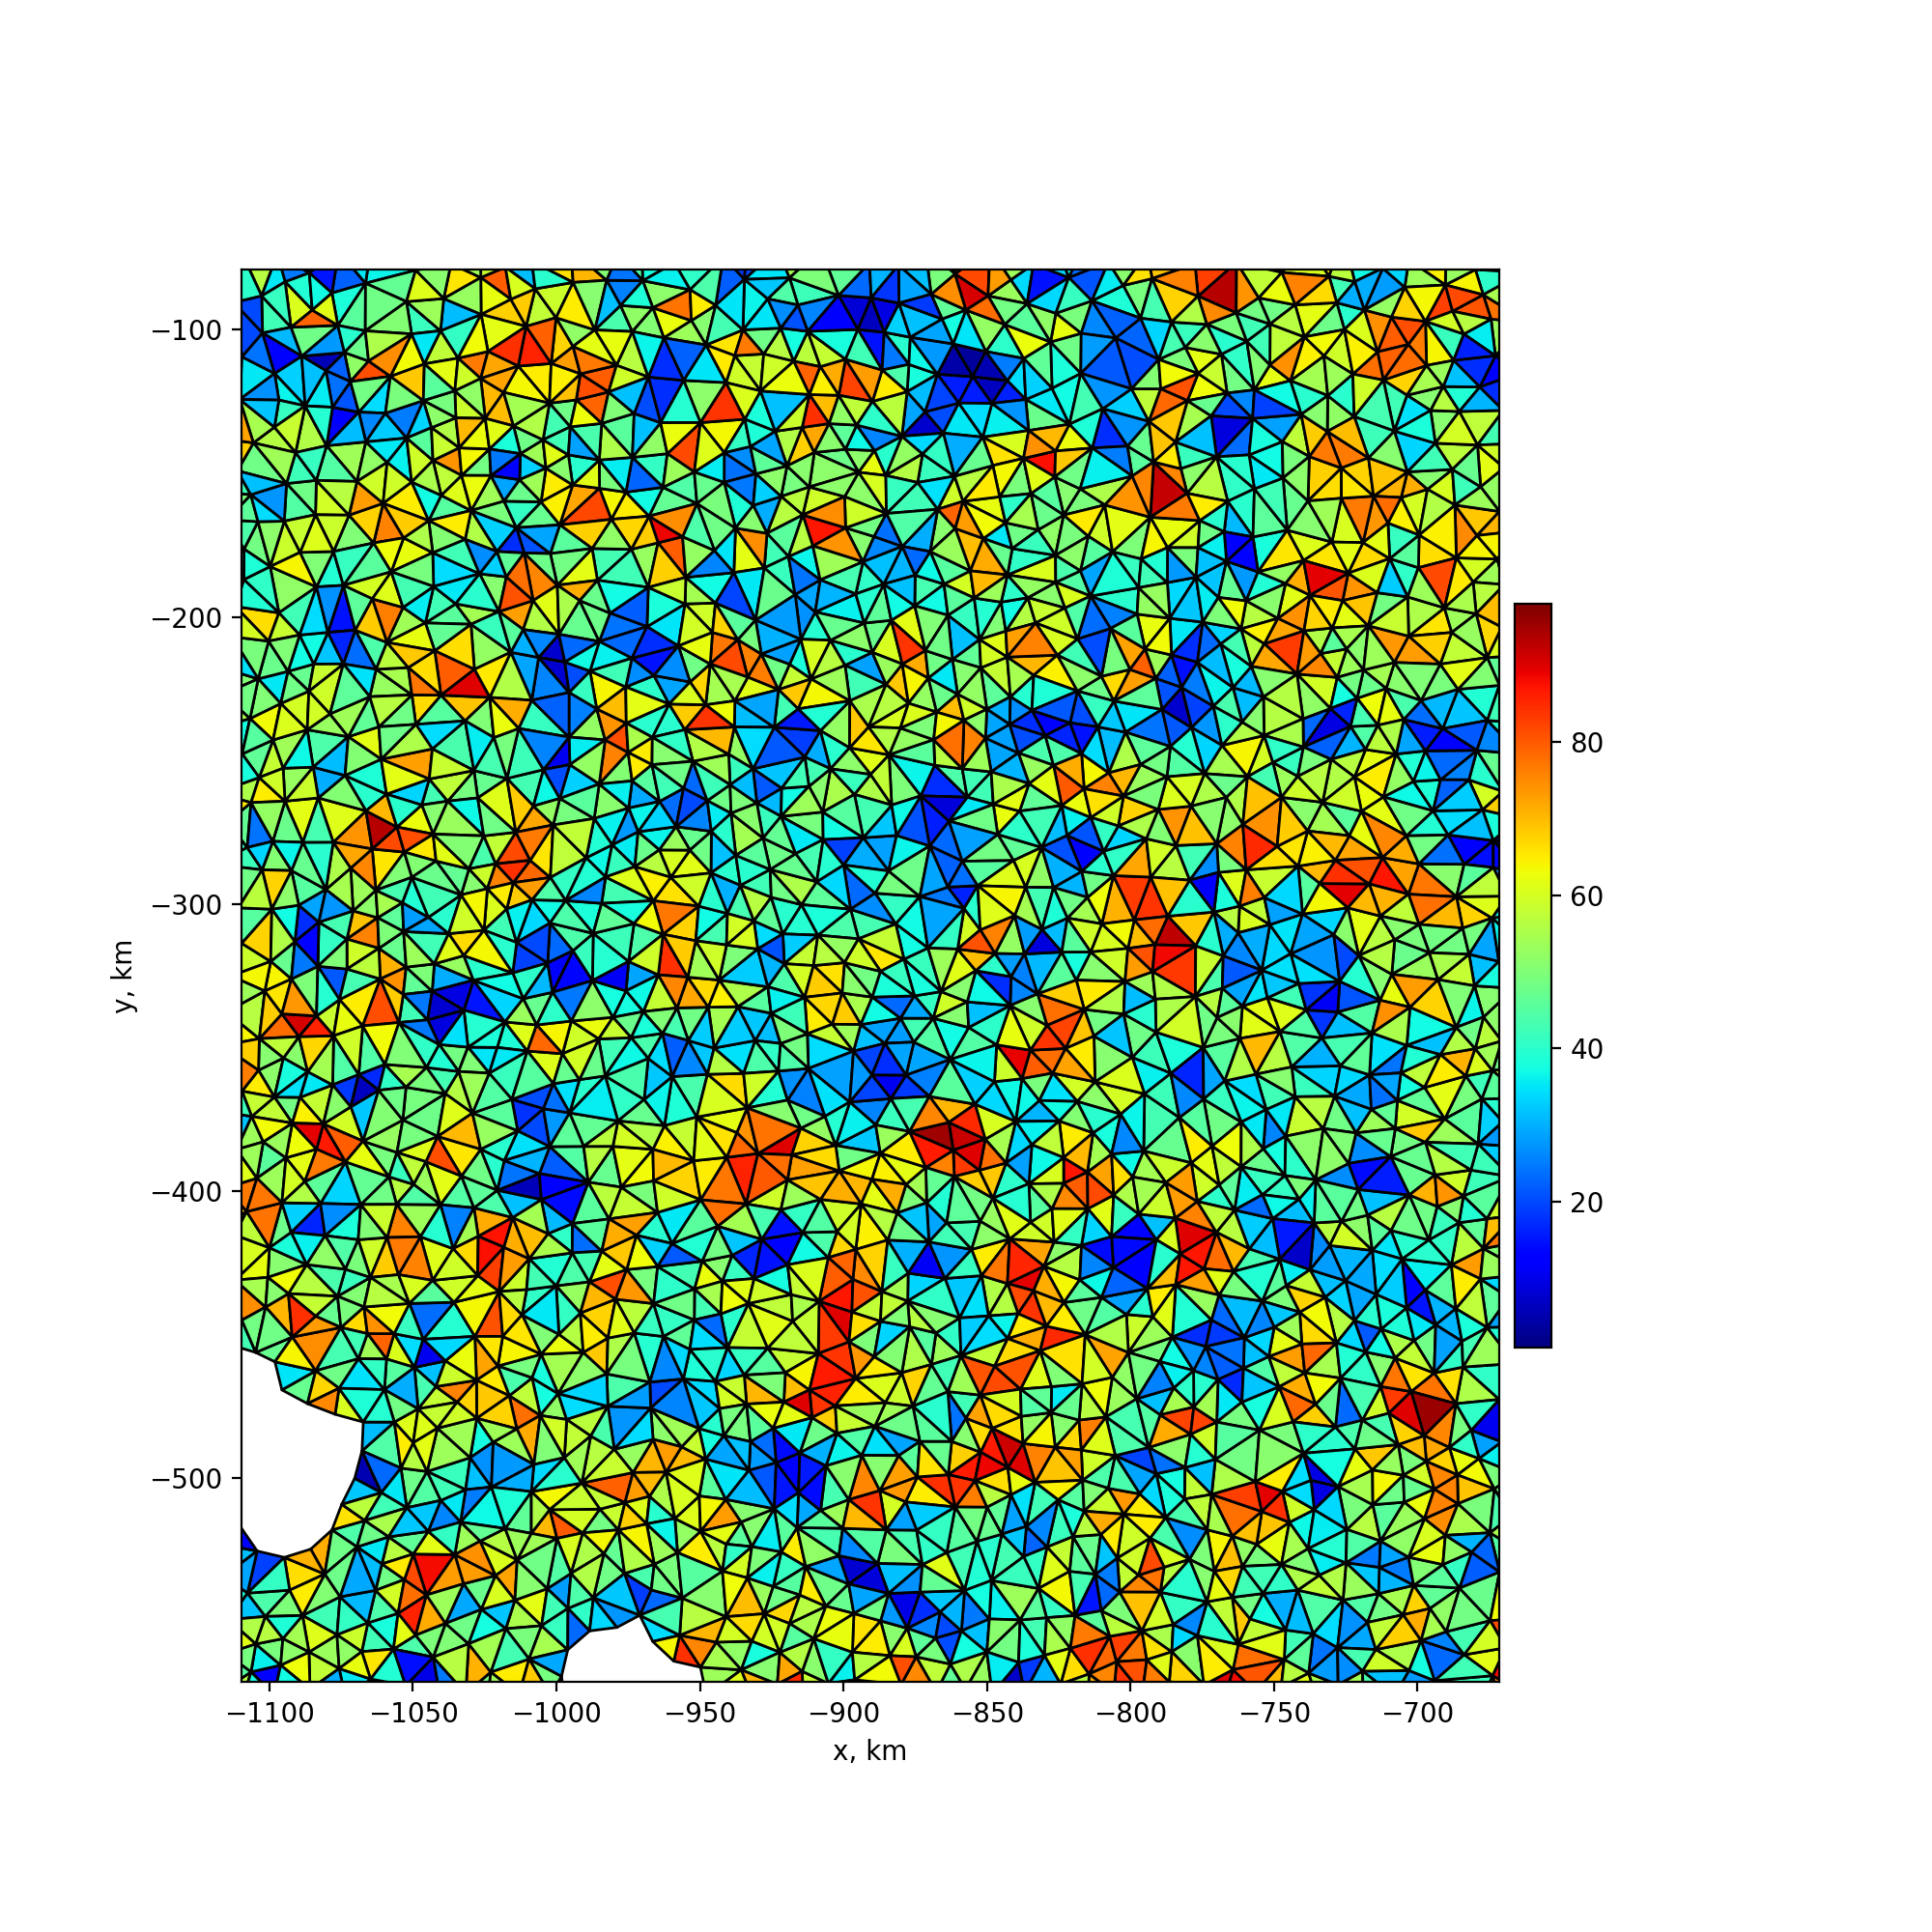

In [31]:
ax = plt.figure(figsize=(10, 10)).add_subplot(111)
fig = ax.figure

sfac=1e-3
cmap='jet'

nodes_x, nodes_y = mesh.get_nodes_xy()
indices = mesh.get_indices("triangles", numbering='gmsh', asvector=False)
Nn = mesh.num_nodes
Ne = mesh.num_triangles

num_nodes=np.random.randint(0,100,(Nn))
data = np.mean(num_nodes[indices], axis=1)

ax.set_xlim([sfac*nodes_x.min(),sfac*nodes_x.max()])
ax.set_ylim([sfac*nodes_y.min(),sfac*nodes_y.max()])
ax.set_aspect('equal')

patch_list  = []

for inds in indices:
    ccl   = []
    for n in inds:
        ccl.append((sfac*nodes_x[n],sfac*nodes_y[n]))
    ccl.append(ccl[0]) # close the contour
    patch_list.append(patches.Polygon(ccl,True,linewidth=0))

pc = collections.PatchCollection(patch_list, cmap=cmap, alpha=1)
pc.set_array(data)
pc.set_edgecolor('k')

ax.add_collection(pc)

ax.set_xlabel('x, km')
ax.set_ylabel('y, km')

cbar  = fig.colorbar(pc, ax=ax, orientation="vertical", pad=0.01, shrink=0.5)

<IPython.core.display.Javascript object>


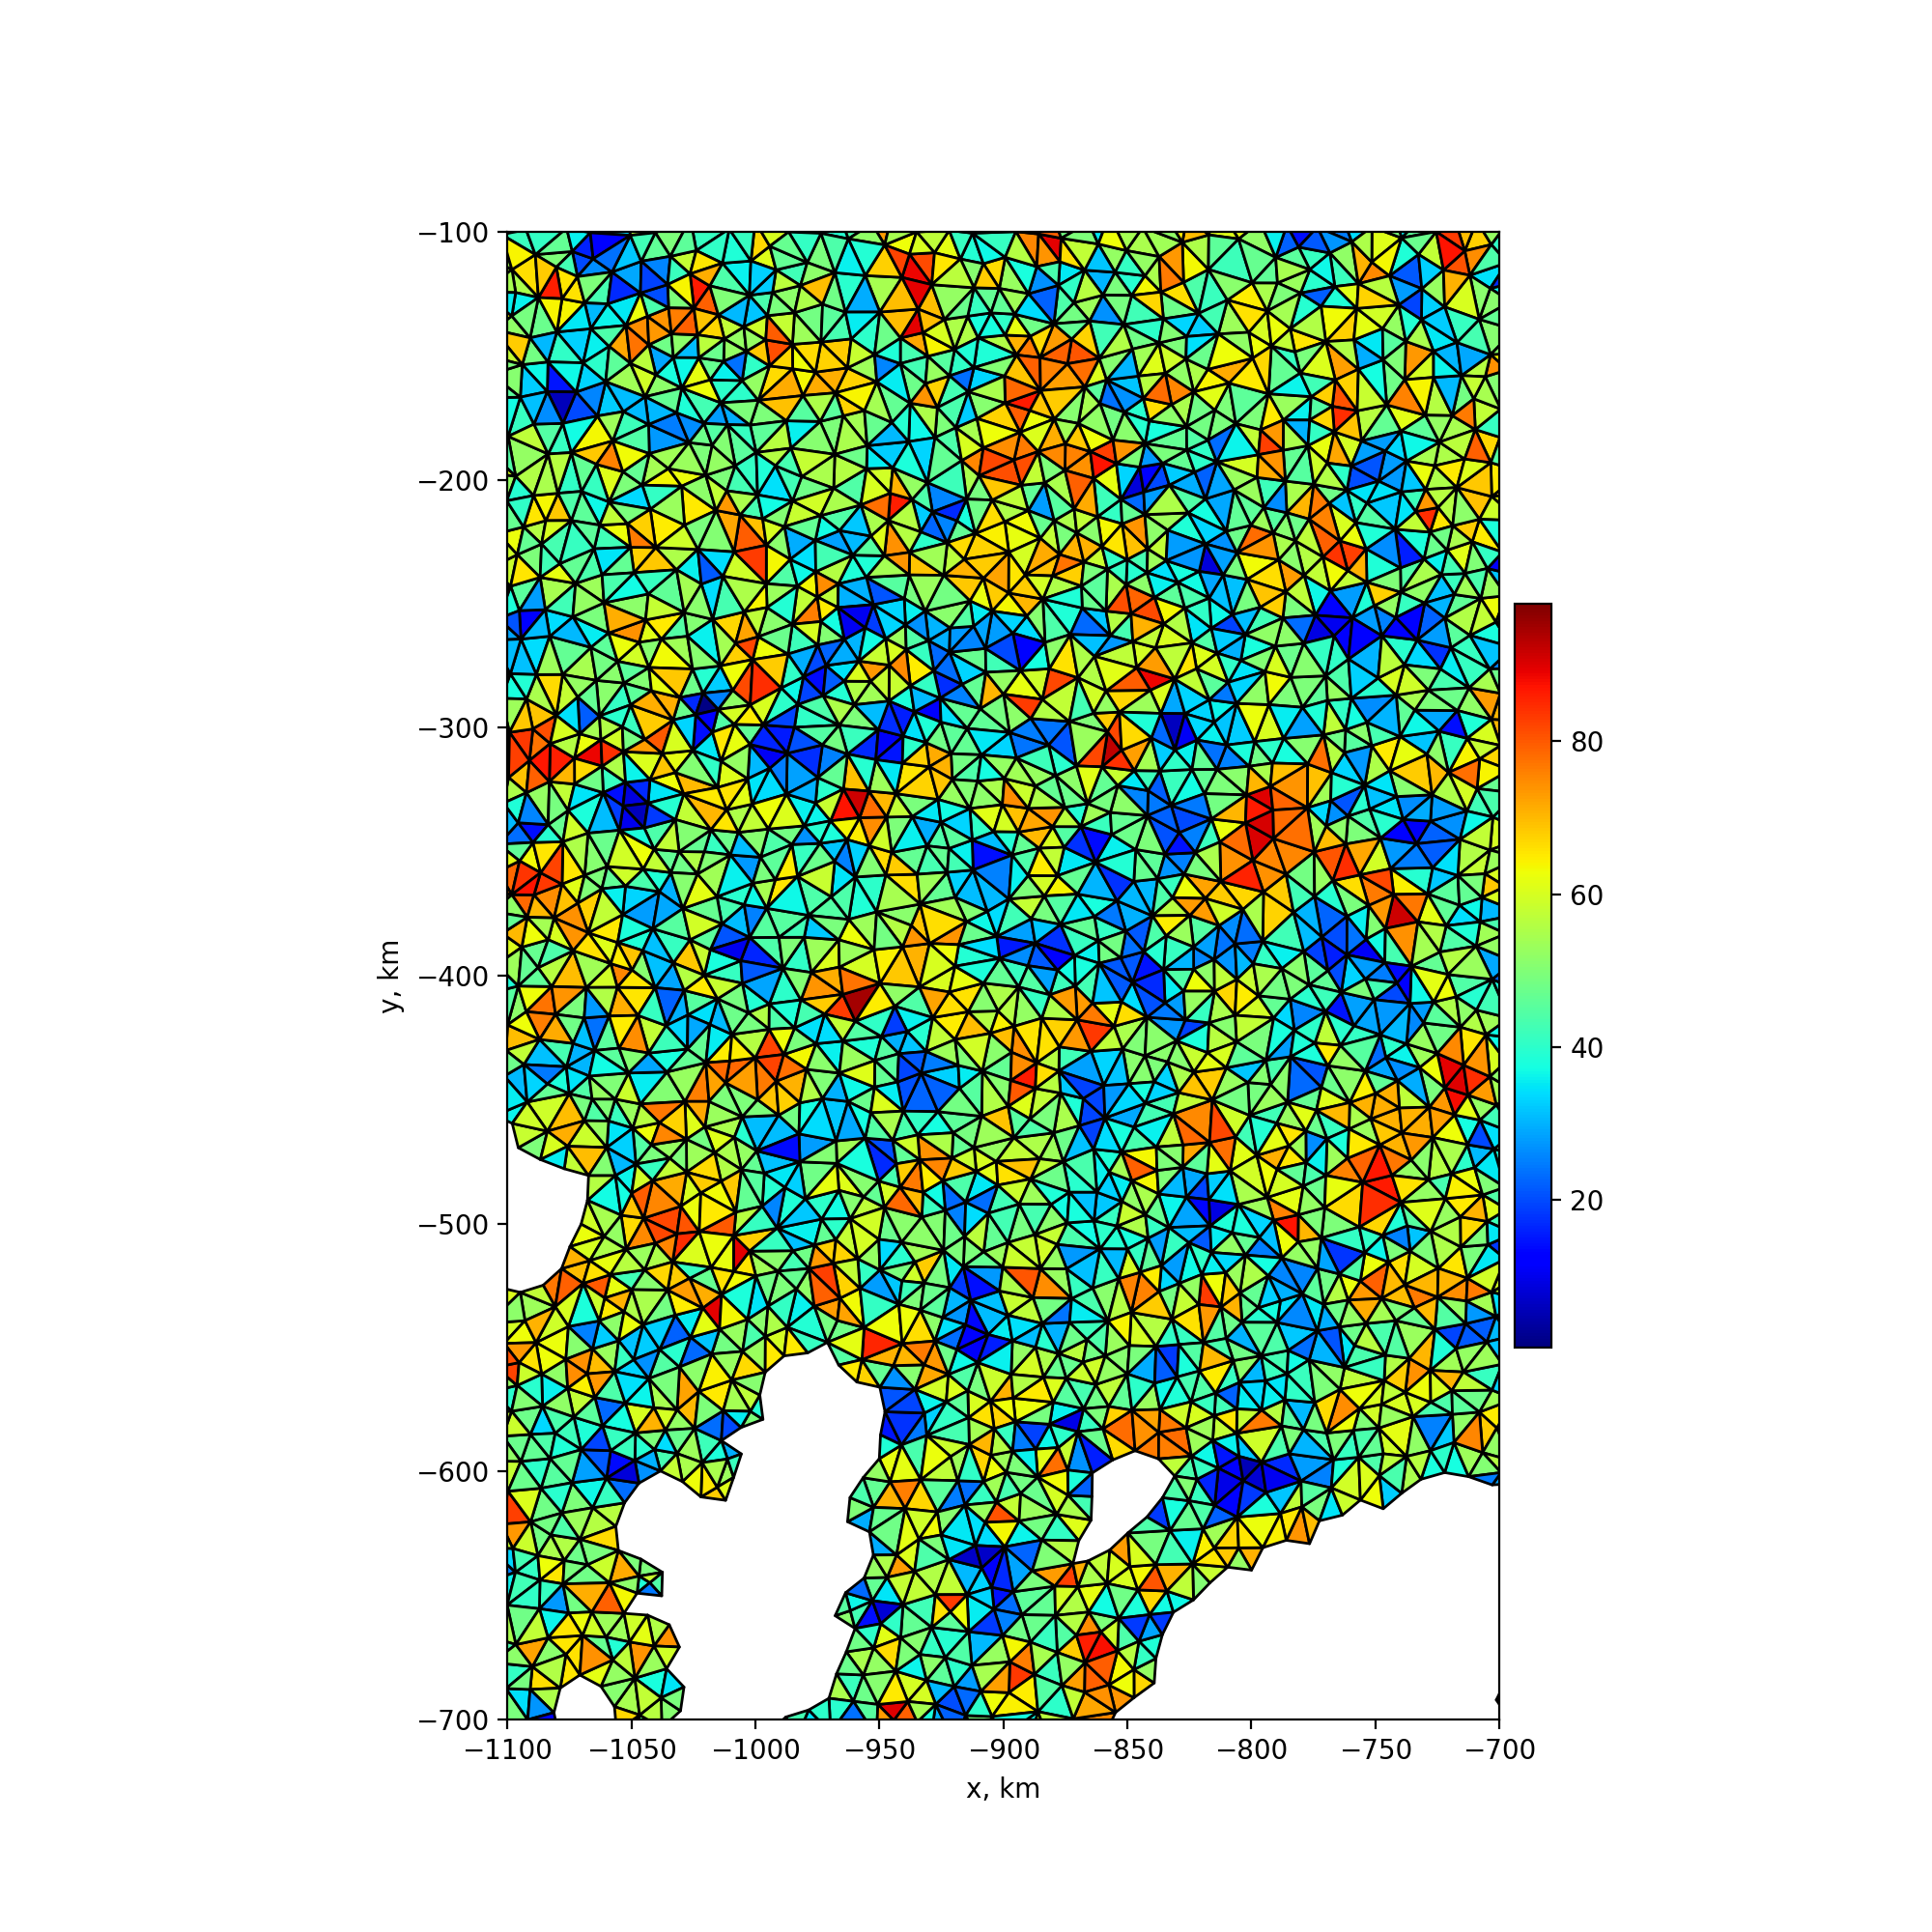

In [32]:
ax = plt.figure(figsize=(10, 10)).add_subplot(111)
fig = ax.figure

sfac=1e-3
cmap='jet'

nodes_x, nodes_y = mesh.get_nodes_xy()
indices = mesh.get_indices("triangles", numbering='gmsh', asvector=False)
Nn = mesh.num_nodes
Ne = mesh.num_triangles

num_nodes=np.random.randint(0,100,(Nn))
data = np.mean(num_nodes[indices], axis=1)

ax.set_xlim([-1100,-700])
ax.set_ylim([-700,-100])
ax.set_aspect('equal')

patch_list  = []

for inds in indices:
    ccl   = []
    for n in inds:
        ccl.append((sfac*nodes_x[n],sfac*nodes_y[n]))
    ccl.append(ccl[0]) # close the contour
    patch_list.append(patches.Polygon(ccl,True,linewidth=0))

pc = collections.PatchCollection(patch_list, cmap=cmap, alpha=1)
pc.set_array(data)
pc.set_edgecolor('k')

ax.add_collection(pc)

ax.set_xlabel('x, km')
ax.set_ylabel('y, km')

cbar  = fig.colorbar(pc, ax=ax, orientation="vertical", pad=0.01, shrink=0.5)

<IPython.core.display.Javascript object>


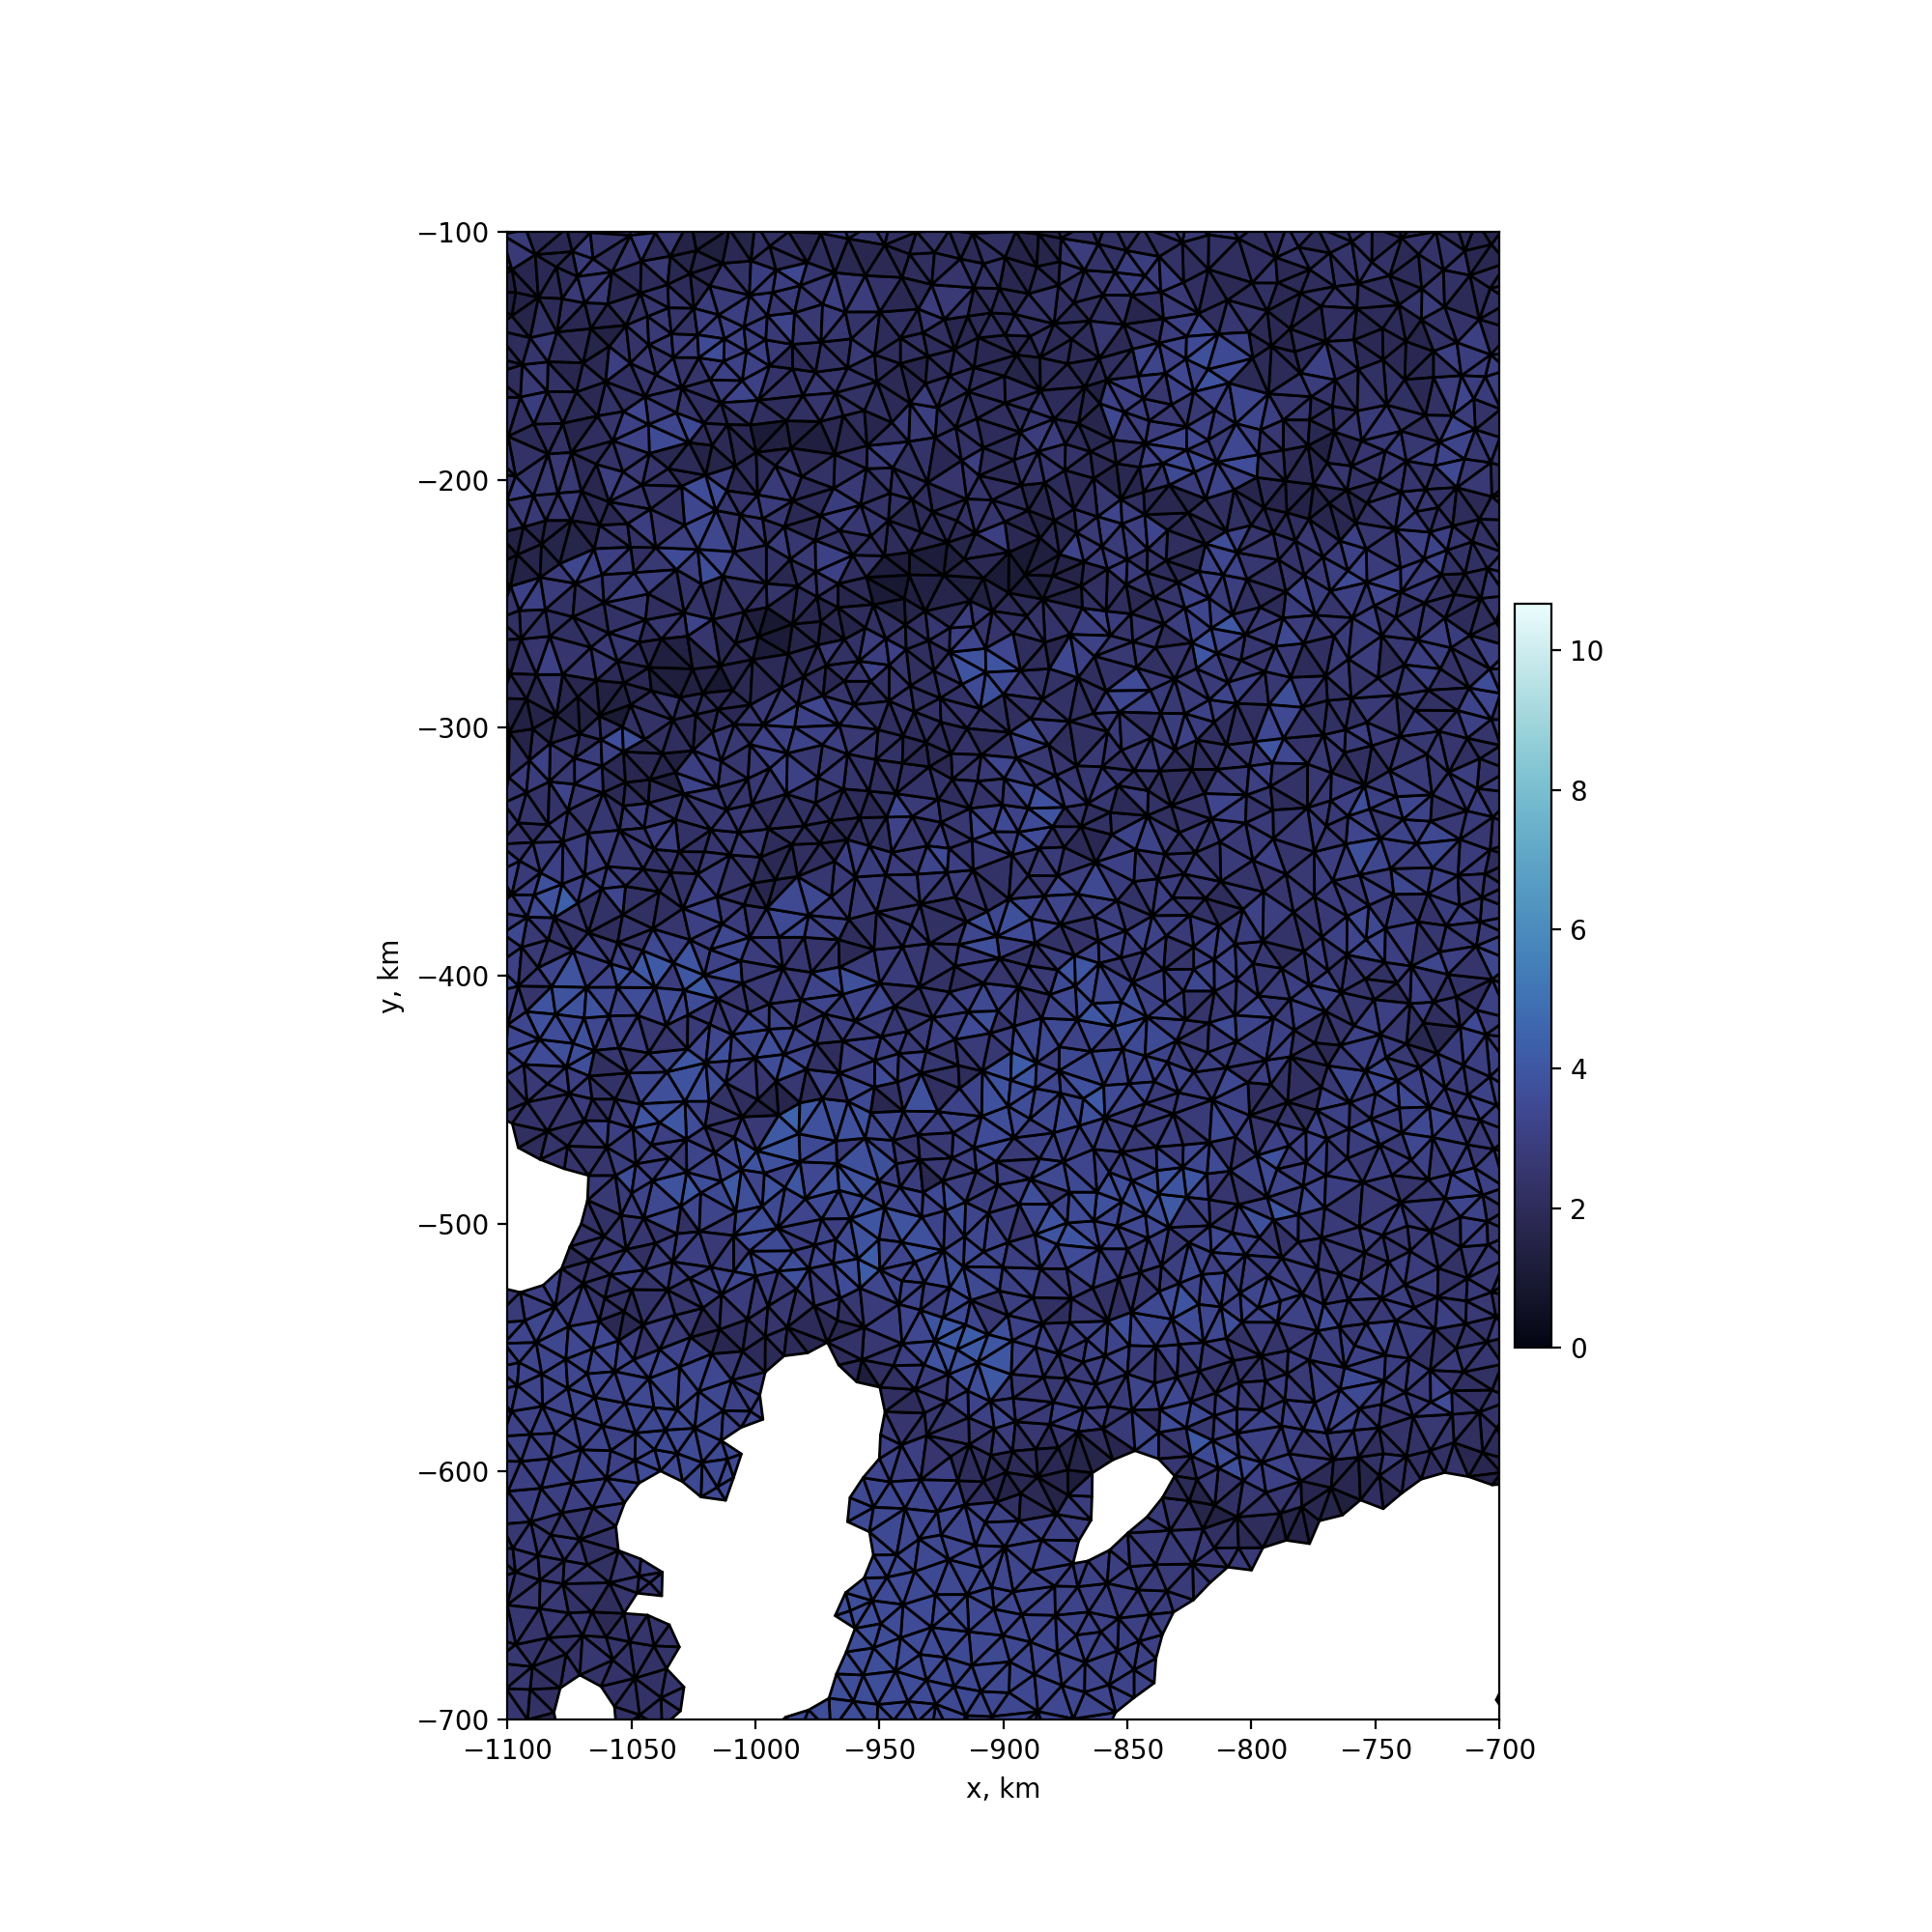

In [49]:
ax = plt.figure(figsize=(10, 10)).add_subplot(111)
fig = ax.figure

sfac=1e-3
cmap='ice'

nodes_x, nodes_y = mesh.get_nodes_xy()
indices = mesh.get_indices("triangles", numbering='gmsh', asvector=False)
Nn = mesh.num_nodes
Ne = mesh.num_triangles


data = thick

ax.set_xlim([-1100,-700])
ax.set_ylim([-700,-100])
ax.set_aspect('equal')

patch_list  = []

for inds in indices:
    ccl   = []
    for n in inds:
        ccl.append((sfac*nodes_x[n],sfac*nodes_y[n]))
    ccl.append(ccl[0]) # close the contour
    patch_list.append(patches.Polygon(ccl,True,linewidth=0))

pc = collections.PatchCollection(patch_list, cmap=cmap, alpha=1)
pc.set_array(data)
pc.set_edgecolor('k')

ax.add_collection(pc)

ax.set_xlabel('x, km')
ax.set_ylabel('y, km')

cbar  = fig.colorbar(pc, ax=ax, orientation="vertical", pad=0.01, shrink=0.5)

In [52]:
mesh_file='/data/experiments/run_330d_nodebug/par32small_arctic_10km.msh'
mesh=GmshMesh(mesh_file)

Reading /data/experiments/run_330d_nodebug/par32small_arctic_10km.msh...



UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcd in position 57: invalid continuation byte

In [53]:
mesh_file='/data/experiments/run3_330d_nodebug/par32small_arctic_10km.msh'
mesh=GmshMesh(mesh_file)

Reading /data/experiments/run3_330d_nodebug/par32small_arctic_10km.msh...

Finished reading /data/experiments/run3_330d_nodebug/par32small_arctic_10km.msh.



/nextsim-tools/python/pynextsim/gmshlib.py:278: UserWarning: No edge elements found in msh file
  self._get_boundary()


<IPython.core.display.Javascript object>


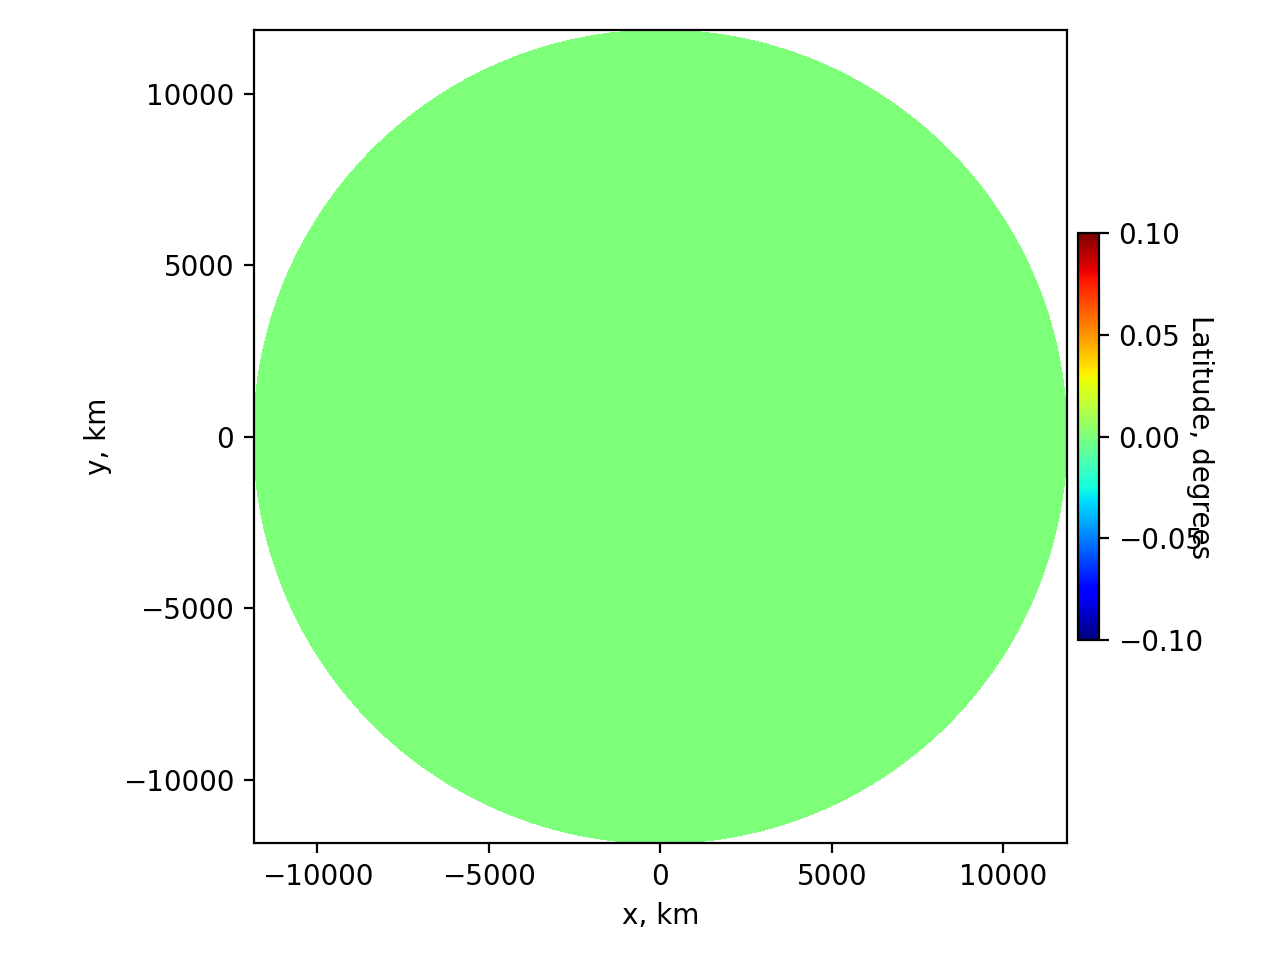

AttributeError: Unknown attribute gmsh_mesh

In [57]:
mesh.plot(plot_grid=False,plot_coast=True,show=True)

Reading /data/small_arctic_10km.msh...



/nextsim-tools/python/pynextsim/gmshlib.py:582: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for li in lm:
/nextsim-tools/python/pynextsim/gmshlib.py:608: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  open_boundaries = [e for e in omm]
/nextsim-tools/python/pynextsim/gmshlib.py:621: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for li in cmm:


Finished reading /data/small_arctic_10km.msh.



<IPython.core.display.Javascript object>


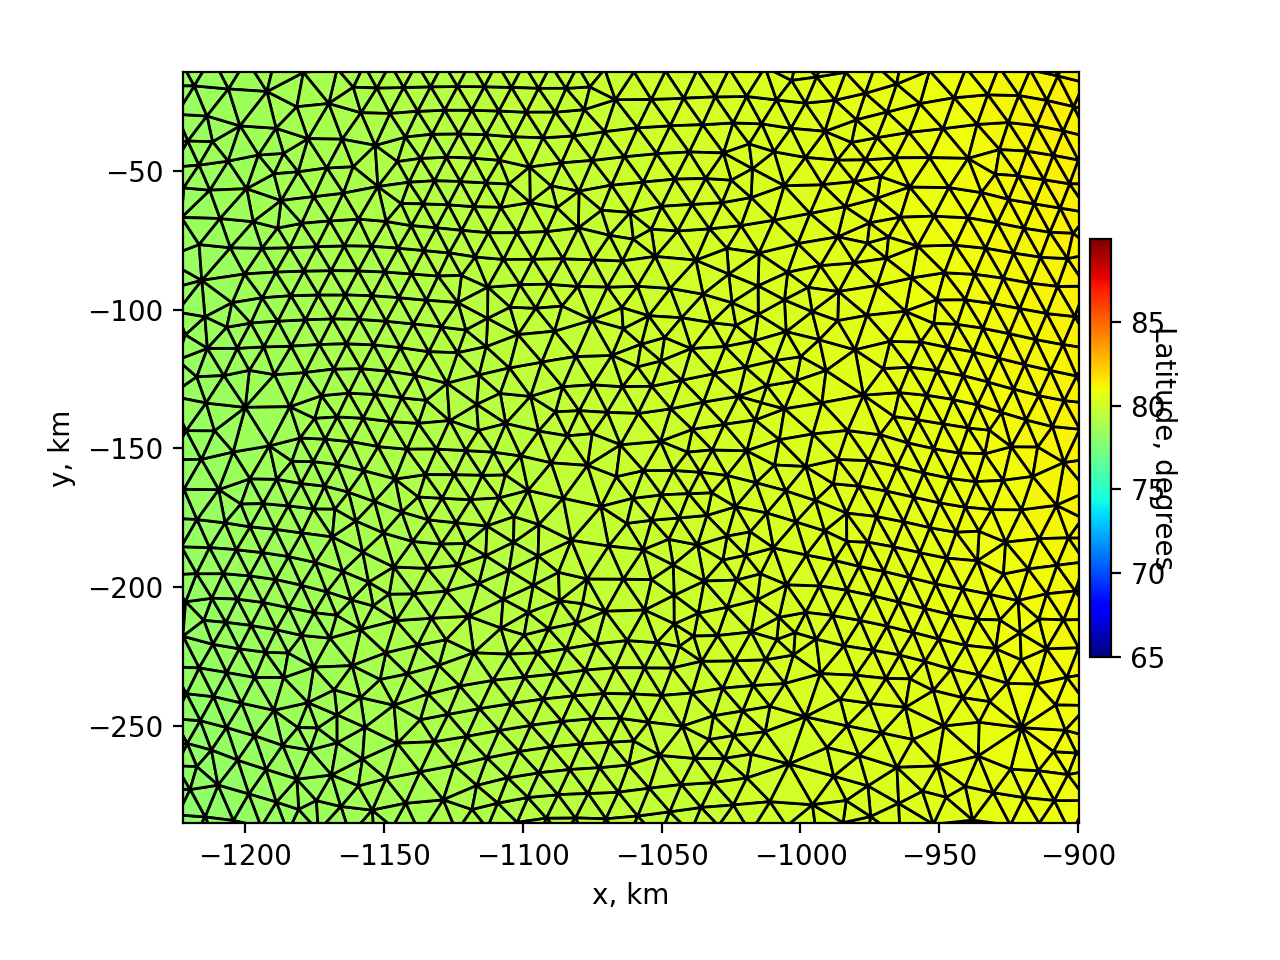

NameError: name 'pobj' is not defined

In [58]:
mesh_file='/data/small_arctic_10km.msh'
mesh=GmshMesh(mesh_file)
mesh.plot(plot_grid=True,plot_coast=True,show=True)

In [62]:
import gmsh

ModuleNotFoundError: No module named 'gmsh'